In [3]:
import pandas as pd

In [4]:
# Assuming the dataset has 'Sentiment' column containing sentiment value and 'SentimentText' column containing textual data 

#Load the training dataset
train = pd.read_csv('data/train.csv', encoding='latin-1')
print(train.shape)

(99989, 3)


In [5]:
# Display the first few rows of the dataset
print(train.head(10))

   ItemID  Sentiment                                      SentimentText
0       1          0                       is so sad for my APL frie...
1       2          0                     I missed the New Moon trail...
2       3          1                            omg its already 7:30 :O
3       4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4       5          0           i think mi bf is cheating on me!!!   ...
5       6          0                  or i just worry too much?        
6       7          1                 Juuuuuuuuuuuuuuuuussssst Chillin!!
7       8          0         Sunny Again        Work Tomorrow  :-|  ...
8       9          1        handed in my uniform today . i miss you ...
9      10          1           hmmmm.... i wonder how she my number @-)


In [6]:
# Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')  
    
   # replace username 
    tweet= re.sub('@[^\s]+', 'AT_USER', tweet)
    
    # convert to lowercase
    tweet.lower()
    
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', 'URL', tweet)
    
    # remove hashtags, only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweet = []
    for word in tweet_tokens:
        if (word not in stopwords_english): # remove stopwords
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)
    return tweet

In [7]:
# Split data into features and labels
X = train['SentimentText']
y = train['Sentiment']   # Assuming 'label' contains sentiment labels (1 for positive, 0 for negative)

In [8]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Convert text data to numerical features using TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [10]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train_vectorized, y_train)
log_reg.score(X_train_vectorized, y_train)
print('The accuracy of Trained data is ', log_reg.score(X_train_vectorized, y_train))

The accuracy of Trained data is  0.7613981572926954


In [11]:
# Predict the model
predictions = log_reg.predict(X_test_vectorized)

In [28]:
# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"The accuracy of test data: Accuracy: {accuracy*100:.2f}%")

# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions)
print(f"Precision: {precision*100:.2f}%")

# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print(f"Recall: {recall*100:.2f}%")

# Calculate f1-score
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions)
print(f"F1-Score: {f1_score*100:.2f}%")

The accuracy of test data: Accuracy: 75.19%
Precision: 75.88%
Recall: 81.93%
F1-Score: 78.79%


In [29]:
# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 75.19%


In [31]:
# Calculate precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions)
print(f"Precision: {precision*100:.2f}%")

Precision: 75.88%


In [32]:
# Calculate recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions)
print(f"Recall: {recall*100:.2f}%")

Recall: 81.93%


In [33]:
# Calculate f1-score
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, predictions)
print(f"F1-Score: {f1_score*100:.2f}%")

F1-Score: 78.79%


In [17]:
# # Display classification report
# from sklearn.metrics import classification_report

# print("\nClassification Report:")
# print(classification_report(y_test, predictions))

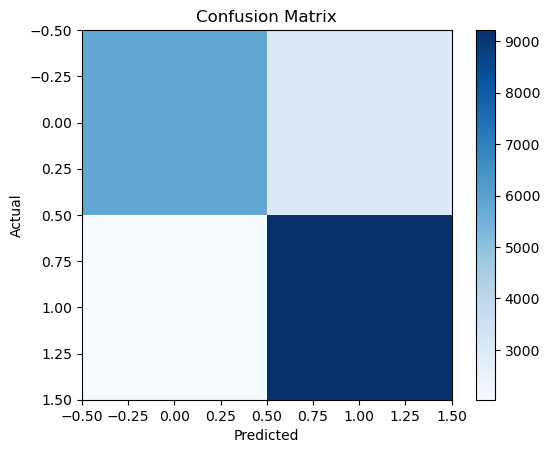

[[5820 2930]
 [2032 9216]]


In [18]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predictions)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(conf_matrix)

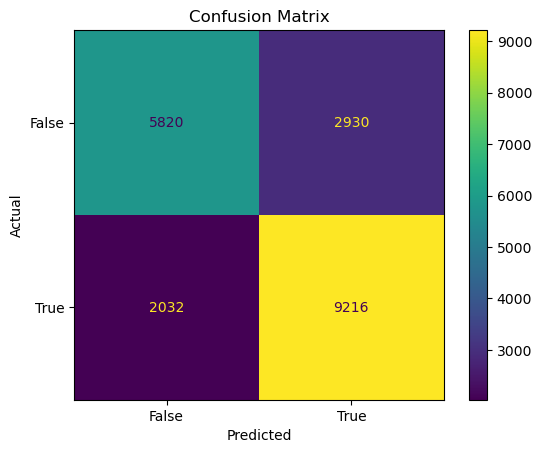

In [19]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Function to predict sentiment for user input
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    prediction = log_reg.predict(text_tfidf)
    return 'Positive' if prediction == 1 else 'Negative'
    
# User input
user_input = input("Enter the text to check sentiment")
# print(f"User Input: {user_input}")
print(f"Sentiment: {predict_sentiment(user_input)}")

Enter the text to check sentiment I love this movie! It's fantastic.


Sentiment: Positive
